In [1]:
import string 
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 1000) 
from scipy import stats 
from itertools import cycle 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn
import datetime

In [3]:
df=pd.read_csv(r'D:\donwloads\Birzha\EUR_RUB_20102020_18112020.csv' ,sep=';')
df

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:01,91.4787,0
1,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:02,91.4709,0
2,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:09,91.5290,0
3,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:12,91.5499,0
4,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:13,91.5611,0
...,...,...,...,...,...,...
1008359,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:54,90.0881,0
1008360,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:55,90.0881,0
1008361,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:56,90.0881,0
1008362,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:58,90.0880,0


In [4]:
labels=[0 for i in range(0,df["<TICKER>"].size)]
df['labels']=labels

In [5]:
i=1
while (i<df["<TICKER>"].size-1):
    if (df["<CLOSE>"][i]>df["<CLOSE>"][i-1] and df["<CLOSE>"][i]>df["<CLOSE>"][i+1]):
        df['labels'][i]=2 #sell
    if (df["<CLOSE>"][i]<df["<CLOSE>"][i-1] and df["<CLOSE>"][i]<df["<CLOSE>"][i+1]):
        df['labels'][i]=1 #buy
    i+=1
df

<ipython-input-5-22f4368537c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'][i]=1 #buy
<ipython-input-5-22f4368537c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'][i]=2 #sell


,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>,labels
0,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:01,91.4787,0,0
1,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:02,91.4709,0,1
2,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:09,91.5290,0,0
3,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:12,91.5499,0,0
4,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:13,91.5611,0,2
...,...,...,...,...,...,...,...
1008359,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:54,90.0881,0,0
1008360,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:55,90.0881,0,0
1008361,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:56,90.0881,0,0
1008362,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:58,90.0880,0,0


In [6]:
delta1=[0 for i in range(0,df["<TICKER>"].size)]
delta2=[0 for i in range(0,df["<TICKER>"].size)]
i=1
while (i<df["<TICKER>"].size):
    delta1[i]=df["<CLOSE>"][i]-df["<CLOSE>"][i-1]
    i+=1
df['delta1']=delta1
delta1=[0 for i in range(0,df["<TICKER>"].size)]

i=2
while (i<df["<TICKER>"].size):
    delta2[i]=df["<CLOSE>"][i]-df["<CLOSE>"][i-2]
    i+=1
df['delta2']=delta2
df

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>,labels,delta1,delta2
0,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:01,91.4787,0,0,0.0000,0.0000
1,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:02,91.4709,0,1,-0.0078,0.0000
2,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:09,91.5290,0,0,0.0581,0.0503
3,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:12,91.5499,0,0,0.0209,0.0790
4,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:13,91.5611,0,2,0.0112,0.0321
...,...,...,...,...,...,...,...,...,...
1008359,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:54,90.0881,0,0,0.0000,0.0000
1008360,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:55,90.0881,0,0,0.0000,0.0000
1008361,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:56,90.0881,0,0,0.0000,0.0000
1008362,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:58,90.0880,0,0,-0.0001,-0.0001


In [7]:
day=[0 for i in range(0,df["<TICKER>"].size)]
from datetime import datetime, date, time
i=0
while (i<df["<TICKER>"].size):
    day[i]=datetime.weekday(datetime.strptime(df["<DATE>"][i]+"20 "+df["<TIME>"][i], 
                             "%d/%m/%Y %H:%M:%S"))
    i+=1
df['day']=day

In [8]:
#day=datetime.weekday(datetime.strptime(df["<DATE>"][5]+"20 "+df["<TIME>"][5], 
                             #"%d/%m/%Y %H:%M:%S"))
#day

In [9]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>,labels,delta1,delta2,day
0,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:01,91.4787,0,0,0.0000,0.0000,1
1,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:02,91.4709,0,1,-0.0078,0.0000,1
2,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:09,91.5290,0,0,0.0581,0.0503,1
3,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:12,91.5499,0,0,0.0209,0.0790,1
4,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:13,91.5611,0,2,0.0112,0.0321,1
...,...,...,...,...,...,...,...,...,...,...
1008359,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:54,90.0881,0,0,0.0000,0.0000,2
1008360,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:55,90.0881,0,0,0.0000,0.0000,2
1008361,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:56,90.0881,0,0,0.0000,0.0000,2
1008362,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:58,90.0880,0,0,-0.0001,-0.0001,2


In [10]:
dd=[0 for i in range(0,df["<TICKER>"].size)]
mm=[0 for i in range(0,df["<TICKER>"].size)]
yy=[0 for i in range(0,df["<TICKER>"].size)]
i=0
while (i<df["<TICKER>"].size):
    dd[i]=int(df["<DATE>"][i][0:2])
    mm[i]=int(df["<DATE>"][i][3:5])
    yy[i]=int(df["<DATE>"][i][6:8])+2000
    i+=1

In [11]:
hours=[0 for i in range(0,df["<TICKER>"].size)]
mins=[0 for i in range(0,df["<TICKER>"].size)]
secs=[0 for i in range(0,df["<TICKER>"].size)]
i=0
while (i<df["<TICKER>"].size):
    hours[i]=int(df["<TIME>"][i][0:2])
    mins[i]=int(df["<TIME>"][i][3:5])
    secs[i]=int(df["<TIME>"][i][6:8])
    i+=1

In [12]:
df['hours']=hours
df['mins']=mins
df['secs']=secs

In [13]:
df['dd']=dd
df['mm']=mm
df['yy']=yy
df

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>,labels,delta1,delta2,day,hours,mins,secs,dd,mm,yy
0,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:01,91.4787,0,0,0.0000,0.0000,1,10,0,1,20,10,2020
1,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:02,91.4709,0,1,-0.0078,0.0000,1,10,0,2,20,10,2020
2,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:09,91.5290,0,0,0.0581,0.0503,1,10,0,9,20,10,2020
3,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:12,91.5499,0,0,0.0209,0.0790,1,10,0,12,20,10,2020
4,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:13,91.5611,0,2,0.0112,0.0321,1,10,0,13,20,10,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008359,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:54,90.0881,0,0,0.0000,0.0000,2,22,48,54,18,11,2020
1008360,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:55,90.0881,0,0,0.0000,0.0000,2,22,48,55,18,11,2020
1008361,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:56,90.0881,0,0,0.0000,0.0000,2,22,48,56,18,11,2020
1008362,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:58,90.0880,0,0,-0.0001,-0.0001,2,22,48,58,18,11,2020


In [14]:
TIME=[0 for i in range(0,df["<TICKER>"].size)]
i=0
while (i<df["<TICKER>"].size):
    TIME[i]=(df['hours'][i]-10)*3600+df['mins'][i]*60+df['secs'][i]
    i+=1

In [15]:
avg=[0 for i in range(0,df["<TICKER>"].size)]
summa=0
i=0
j=0
k=0
day=df['dd'][i]
while (j+1<df["<TICKER>"].size):
    k=0
    while (df['dd'][k+j]==df['dd'][j] and k+j+1<df["<TICKER>"].size):
        summa+=df['<CLOSE>'][k+j]
        k+=1
    summa=summa/k
    k=0
    while (df['dd'][k+j]==df['dd'][j] and k+j+1<df["<TICKER>"].size):
        avg[k+j]=summa
        k+=1
    summa=0
    j+=k
    

In [16]:
df['avg']=avg
df['time']=TIME
df

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>,labels,delta1,delta2,day,hours,mins,secs,dd,mm,yy,avg,time
0,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:01,91.4787,0,0,0.0000,0.0000,1,10,0,1,20,10,2020,91.707675,1
1,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:02,91.4709,0,1,-0.0078,0.0000,1,10,0,2,20,10,2020,91.707675,2
2,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:09,91.5290,0,0,0.0581,0.0503,1,10,0,9,20,10,2020,91.707675,9
3,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:12,91.5499,0,0,0.0209,0.0790,1,10,0,12,20,10,2020,91.707675,12
4,EUR/RUB - ФИКСИНГ 1 СЕК.,0,20/10/20,10:00:13,91.5611,0,2,0.0112,0.0321,1,10,0,13,20,10,2020,91.707675,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008359,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:54,90.0881,0,0,0.0000,0.0000,2,22,48,54,18,11,2020,90.053652,46134
1008360,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:55,90.0881,0,0,0.0000,0.0000,2,22,48,55,18,11,2020,90.053652,46135
1008361,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:56,90.0881,0,0,0.0000,0.0000,2,22,48,56,18,11,2020,90.053652,46136
1008362,EUR/RUB - ФИКСИНГ 1 СЕК.,0,18/11/20,22:48:58,90.0880,0,0,-0.0001,-0.0001,2,22,48,58,18,11,2020,90.053652,46138


In [17]:
df['labels'].value_counts()

0    698154
2    155407
1    154803
Name: labels, dtype: int64

In [18]:
a=df["<TICKER>"].size
train={
    'time':df['time'][:round(a*0.8)],
    '<CLOSE>':df['<CLOSE>'][:round(a*0.8)],
      'delta1':df['delta1'][:round(a*0.8)],
    'delta2':df['delta2'][:round(a*0.8)],
'day':df['day'][:round(a*0.8)]}
df_train=pd.DataFrame(data=train)
test={
    'time':df['time'][round(a*0.8):],
    '<CLOSE>':df['<CLOSE>'][round(a*0.8):],
      'delta1':df['delta1'][round(a*0.8):],
    'delta2':df['delta2'][round(a*0.8):],
'day':df['day'][round(a*0.8):]}
df_test=pd.DataFrame(data=test)

In [19]:
train_labels=df['labels'][:round(a*0.8)]
test_labels=df['labels'][round(a*0.8):]

In [20]:
df_test

,time,<CLOSE>,delta1,delta2,day
806691,37746,91.0618,0.0000,0.0009,3
806692,37747,91.0622,0.0004,0.0004,3
806693,37748,91.0658,0.0036,0.0040,3
806694,37749,91.0658,0.0000,0.0036,3
806695,37750,91.0659,0.0001,0.0001,3
...,...,...,...,...,...
1008359,46134,90.0881,0.0000,0.0000,2
1008360,46135,90.0881,0.0000,0.0000,2
1008361,46136,90.0881,0.0000,0.0000,2
1008362,46138,90.0880,-0.0001,-0.0001,2


In [21]:
round(100* df_test["time"].isnull().sum() / len(df_test), 2)

0.0

In [22]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=27, random_state=15)

In [23]:
clf_tree.fit(df_train, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=27, random_state=15)

In [24]:
b=clf_tree.predict(df_test)

In [25]:
acc_tree = round(clf_tree.score(df_train, train_labels) * 100, 2)
acc_tree

75.76

In [26]:
test_df=df_test.reset_index(drop=True)


In [27]:
clf_tree.predict(df_test[1:4])

array([0, 0, 0], dtype=int64)

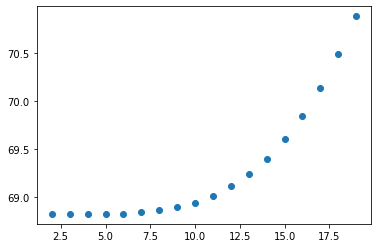

In [29]:
fig, ax = plt.subplots()
count=2
a1=[]
a2=[]
a3=[]
a4=[]
while (count<20):
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=count, random_state=15)
    clf_tree.fit(df_train, train_labels)
    res=clf_tree.predict(df_test)
    a2.append (round(clf_tree.score(df_train, train_labels) * 100, 2))
    a1.append (count)
    result=pd.DataFrame(data={'res':res})
    i=0
    k=1
    LastBuy=0
    LastSell=0
    wallet=0
    acc=0
    while (i<test_df["<CLOSE>"].size):
        if (k==1 and result['res'][i]==1): #buy
            LastBuy=test_df["<CLOSE>"][i]
            wallet-=LastBuy
            k=0
        if (k==0 and result['res'][i]==2): #sell
            LastSell=test_df["<CLOSE>"][i]
            wallet+=LastSell
            k=1
        if (result['res'][i]==test_labels[806691+i]): 
            acc+=1
        i+=1
    if (k==0):
        wallet+=LastBuy
    acc=acc/test_df["<CLOSE>"].size
    a4.append(acc)
    a3.append(wallet*100/80)
    count+=1
ax.scatter(a1,a2)


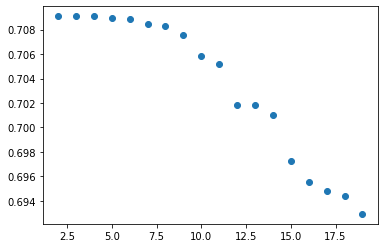

In [30]:
fig, ax = plt.subplots()
ax.scatter(a1,a4)

In [31]:
i=0
acc=0
while (i<test_df["<CLOSE>"].size):
        if (result['res'][i]==test_labels[806691+i]): 
            acc+=1
        i+=1
acc=acc/test_df["<CLOSE>"].size
acc

0.6929236933054995

In [32]:
test_labels

806691     0
806692     0
806693     0
806694     0
806695     0
          ..
1008359    0
1008360    0
1008361    0
1008362    0
1008363    0
Name: labels, Length: 201673, dtype: int64

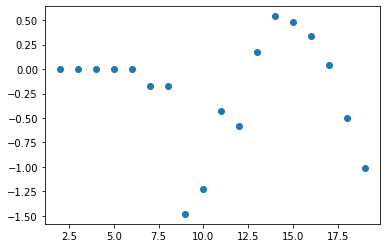

In [33]:
fig, ax = plt.subplots()
ax.scatter(a1,a3)

In [34]:
result=pd.DataFrame(data={'res':b})

In [35]:
result.size

201673

In [36]:
train_labels.value_counts()

0    555149
2    125943
1    125599
Name: labels, dtype: int64

In [37]:
train1=df_train
test1=df_test
train_labels1=train_labels
test_labels1=test_labels

In [38]:
a=806691
i=0
k=0
drops=[400000]
while (i<a-20): 
    if (train_labels[i]==0 and k<400000):
        drops[k]=i
        #train1.drop(i)
        #train_labels1.drop(i)
        k=k+1
    i=i+1

IndexError: list assignment index out of range

In [ ]:
importances = clf_tree.feature_importances_
importances

In [ ]:
test_df=df_test.reset_index(drop=True)

In [ ]:

    i=0
    k=1
    LastBuy=0
    LastSell=0
    wallet=0
    while (i<test_df["<CLOSE>"].size):
        if (k==1 and result['res'][i]==1): #buy
            LastBuy=test_df["<CLOSE>"][i]
            wallet-=LastBuy
            k=0
        if (k==0 and result['res'][i]==2): #sell
            LastSell=test_df["<CLOSE>"][i]
            wallet+=LastSell
            k=1
        i+=1
    if (k==0):
        wallet+=LastBuy
    wallet

In [ ]:
df_train

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 3)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)


optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

criterion = nn.NLLLoss() 

In [ ]:
net = Net()
print(net)

In [ ]:
data=df_train
target=train_labels
epochs=5
data=torch.tensor([ i[0] for i in df_train]).view(-1,5,806691)

In [ ]:
df_train2=df_train
labels2=train_labels
df_train2=pd.concat([df_train2, labels2], axis=1)
df_train2["labels"]

In [ ]:
df_traindf_train2["time"].max()

In [ ]:
data

In [ ]:
import numpy as np

def f(x):
    return 2/(1 + np.exp(-x)) - 1

def df(x):
    return 0.5*(1 + x)*(1 - x)

W1 = np.array([[-0.2, 0.3, -0.4,0.1,0.3], [0.1, -0.3, -0.4,0.1,0.1]])
W2 = np.array([0.2, 0.3])

def go_forward(inp):
    sum = np.dot(W1, inp)
    out = np.array([f(x) for x in sum])

    sum = np.dot(W2, out)
    y = f(sum)
    return (y, out)

def train(epoch):
    global W2, W1
    lmd = 0.01          # шаг обучения
    N = 10000           # число итераций при обучении
    count = 806691
    for k in range(N):
        number=np.random.randint(0, count)
        x = [epoch["time"][number],epoch["<CLOSE>"][number],epoch["delta1"][number],epoch["delta2"][number],epoch["day"][number],epoch["labels"][number]]  # случайных выбор входного сигнала из обучающей выборки
        y, out = go_forward(x[0:5])             # прямой проход по НС и вычисление выходных значений нейронов
        e = y - x[-1]                           # ошибка
        delta = e*df(y)                         # локальный градиент
        W2[0] = W2[0] - lmd * delta * out[0]    # корректировка веса первой связи
        W2[1] = W2[1] - lmd * delta * out[1]    # корректировка веса второй связи

        delta2 = W2*delta*df(out)               # вектор из 2-х величин локальных градиентов

        # корректировка связей первого слоя
        W1[0, :] = W1[0, :] - np.array(x[0:5]) * delta2[0] * lmd
        W1[1, :] = W1[1, :] - np.array(x[0:5]) * delta2[1] * lmd

# обучающая выборка (она же полная выборка)
epoch = df_train2
train(epoch)        # запуск обучения сети

# проверка полученных результатов
for x in epoch:
    y, out = go_forward(x[0:5])
    print(f"Выходное значение НС: {y} => {x[-1]}")

In [ ]:
df_train[2]